# Description

# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

# Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

# Objective:

To implement the techniques learned as a part of the course.


Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

 

# Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

# Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

# Scoring guide (Rubric) - Twitter US Airline Sentiment
## Data Summary
- Add your view and opinion along with the problem statement, Import the libraries, load dataset, print the shape of data, data description.

### 2.5 Points
## Exploratory data analysis
Do Exploratory data analysis(EDA) based on the below statement.
- Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
- Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
- Plot the word cloud graph of tweets for positive and negative sentiment separately. 
- Mention the observations & insights after plotting each graph.

### 6 Points
## Understanding of Data Columns
Understand of data columns
- Drop all other columns except “text” and “airline_sentiment”. 
- Check the shape of the data. 
- Print the first 5 rows of data.

### 1.5 Points
## Data Pre - Processing
Text pre-processing: Data preparation. NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
- Html tag removal.
- Tokenization. 
- Remove the numbers. 
- Removal of Special Characters and Punctuations. 
- Removal of stopwords 
- Conversion to lowercase. 
- Lemmatize or stemming. 
- Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 
- Print the first 5 rows of data after pre-processing.

### 8 Points
## Vectorization
- Use CountVectorizer.
- Use TfidfVectorizer. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

### 6 Points
## Modeling, cross-validation, and Evaluation
- Fit the model using vectorized column 
- Cross-validate the model performance 
- Evaluate the model using the confusion matrix 
- Target the final score >= 75% 
- Print the top 40 features and plot their word cloud using both types of vectorization.

### 10 Points
## Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.

### 4 Points
## Overall Structure and flow of Notebook
Overall notebook should have: 
- Well commented code 
- Structure and flow

### 2 Points
## Total Points	40

# 1. Loading Libraries and Importing Data

In [90]:
# Importing the standard AIML libraries (Some might not be used)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import random
 
#Used for Text PreProcessing
import re, string, unicodedata                                         

#Contraction packge help in expansion of contracted words
import contractions

# count the key-value pairs in an object
from collections import Counter                                       

# Used for plotting the wordcloud of a corpus
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           

# Used for different task of NLP
import nltk                                                               
from nltk.corpus import stopwords                                     
from nltk.stem.porter import PorterStemmer                                
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('wordnet')

# Import BeautifulSoup
import bs4
from bs4 import BeautifulSoup

# Import Spacy for Lemmatization
import spacy

# Import Textblob and VADER for sentiment analysis
import textblob
from textblob import TextBlob
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Importing some sklearn tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# To load the dataset from its saved folder in my Anaconda file structure (uncomment code below)

tweets = pd.read_csv('Tweets.csv')

In [3]:
# To mount my personal drive Google Drive if using Google Colab (uncomment code below)

# from google.colab import drive
# drive.mount('/content/drive')



In [4]:
# To load the dataset from its saved folder on my Google Drive (uncomment code below)

# tweets = pd.read_csv('/content/drive/MyDrive/P10/Tweets.csv')

# 2. Data Overview and Preprocessing

In [5]:
# Making a copy of 'tweets' to keep from corrupting the original data
data = tweets.copy()

In [6]:
# Checking the shape of the data set in Tweets.csv
print(f"The data in tweets has {data.shape[0]} rows and {data.shape[1]} columns.")

The data in tweets has 14640 rows and 15 columns.


In [7]:
# Checking the first five entries in data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# Checking the last five entries in data
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [9]:
# I personally always like to look at a larger random sample to try and discern more information.
data.sample(25, random_state=27)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
615,570249680535339009,neutral,0.6593,NaN,NaN,United,NaN,screamingbrat,NaN,0,@united Thank you.,NaN,2015-02-24 07:51:33 -0800,"new york, baby",Eastern Time (US & Canada)
11804,567751134476259328,negative,1.0000,Can't Tell,1.0000,US Airways,NaN,_JoeChuck,NaN,0,@USAirways @AmericanAir what a joke of a compa...,NaN,2015-02-17 10:23:13 -0800,CT to Queens,Eastern Time (US & Canada)
2668,568963218703564800,negative,1.0000,Bad Flight,0.3657,United,NaN,The_CW,NaN,0,"@united my flight landed 50 min, but we are be...",NaN,2015-02-20 18:39:36 -0800,Ho-Flo/Columbus/NYC,Central Time (US & Canada)
10745,568912730742255616,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,drKCfoot,NaN,0,@USAirways technical issues = inefficient comp...,NaN,2015-02-20 15:18:59 -0800,Philly,Eastern Time (US & Canada)
1452,569714541178679296,positive,0.6576,NaN,NaN,United,NaN,lorrirhymeswith,NaN,0,@united I have 8 flights with you in the next ...,NaN,2015-02-22 20:25:06 -0800,the cupboard under the stairs,NaN
4599,569989039874404352,negative,1.0000,Late Flight,1.0000,Southwest,NaN,DrewDepo,NaN,0,@SouthwestAir prove it,NaN,2015-02-23 14:35:51 -0800,KCMO,NaN
10740,568916807815438336,negative,1.0000,Late Flight,1.0000,US Airways,NaN,L_Hindle,NaN,0,@USAirways here we go again. Same flight as la...,NaN,2015-02-20 15:35:11 -0800,Boston,NaN
6826,570225899964129281,positive,1.0000,NaN,NaN,Delta,NaN,thedaniburden,NaN,0,@JetBlue sounds great! Thank you!! :),NaN,2015-02-24 06:17:03 -0800,"Buffalo, New York",Quito
10459,569279106086522880,negative,0.6571,Late Flight,0.3399,US Airways,NaN,jayarrre,NaN,0,@USAirways will you fly me to somewhere warm? ...,NaN,2015-02-21 15:34:50 -0800,NaN,NaN
5594,568879053496655872,neutral,1.0000,NaN,NaN,Southwest,NaN,MsPersia,NaN,0,@SouthwestAir I cannot DM you as you do not fo...,NaN,2015-02-20 13:05:10 -0800,San Francisco,Pacific Time (US & Canada)


### - There are a few columns that do not have much useful information especially with the work instruction to look specifically at the airline and sentiment. 
### - I am going to look more in depth at the data and likely drop some columns.
### - tweet_location seems to be user determined and has some non factual information and should be dropped. 

In [10]:
data.drop(columns=["tweet_location"], axis=1, inplace=True)

In [11]:
# Looking at the basic info. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  u

### - There are quite a few missing values in negativereason, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location, and user_timezone.

In [12]:
# Checking for duplicated rows.
data.duplicated().sum()


36

In [13]:
# Using the drop_duplicates() function to removed the 36 duplicated rows.
data.drop_duplicates()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,Eastern Time (US & Canada)


### - As seen from the output of the drop_duplicates() function we are now down to 14604 rows. Down the 36 rows from the original 14640 rows.

In [14]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
user_timezone                    4820
dtype: int64

### There are quite a few na values.

In [15]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            
        mis_val = df.isnull().sum()                                                                
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) 
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 14 columns and 14640 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


### - The negativereason_gold, airline_sentiment_gold, and tweet_coord all have 93% or more missing values. I will drop those.
### - negativereason, user_timezone, and negativereason_confidence have between 28.1-37.3% missing values so I will look at them some more. 

In [16]:
data.drop(columns=["negativereason_gold", "airline_sentiment_gold", "tweet_coord",], axis=1, inplace=True)

In [17]:
#Number of distinct entries in negativereason, user_timezone, and negativereason_confidence
data['negativereason'].nunique()

10

In [18]:
#Number of distinct entries in negativereason, user_timezone, and negativereason_confidence
data['user_timezone'].nunique()

85

In [19]:
#Number of distinct entries in negativereason, user_timezone, and negativereason_confidence
data['negativereason_confidence'].nunique()

1410

### - I will drop the user_timezone and negativereason_confidence for their combination of missing values and unique values

In [20]:
data.drop(columns=["negativereason_confidence", "user_timezone"], axis=1, inplace=True)

In [21]:
# Taking a look at what columns are remaining.
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


### I am going to drop tweet_id, airline_sentiment_confidence, name, retweet_count, and tweet_created as they do not help with the current study.

In [22]:
data.drop(columns=["tweet_id", "airline_sentiment_confidence", "name", "retweet_count", "tweet_created"], axis=1, inplace=True)

In [23]:
data.columns

Index(['airline_sentiment', 'negativereason', 'airline', 'text'], dtype='object')

In [24]:
# Summary of the remaining columns minus the text column
cat_cols = [
    "airline_sentiment",
    "negativereason",
    "airline",
]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 100)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
----------------------------------------------------------------------------------------------------
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
----------------------------------------------------------------------------------------------------
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
----------------------------------------------------------------------------------------------------


### - The information ascertained doesn't send out any flags. I will move forward with the EDA

# 3. EDA

In [25]:
# function to create labeled barplots for the categorical data.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bone",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

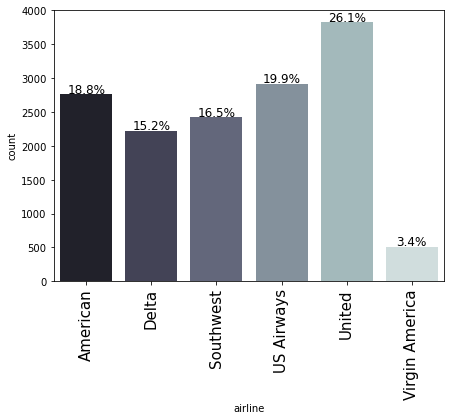

In [26]:
labeled_barplot(data, "airline", perc=True)

### - American, Delta, Southwest, and US Airways are fairly evenly distributed at 15-20% each.
### - United has slightly more representation at 26.1%. Indicating it has more travelers.
### - Virgin America has a lower representation at 3.4%. Indicating it is not as common of an airline as the others.

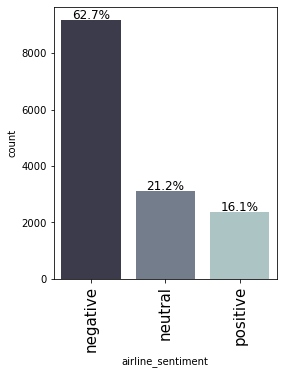

In [27]:
labeled_barplot(data, "airline_sentiment", perc=True)

### - The higher percentage overall of negative tweets tells me that people are more likely to complain about something then they are to praise it.

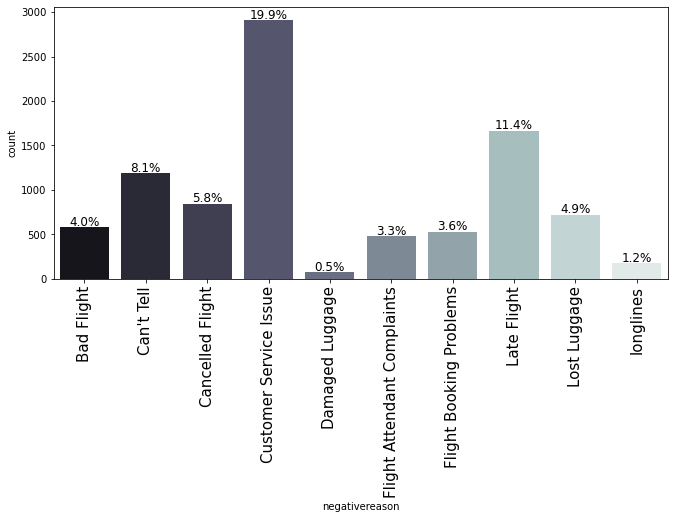

In [28]:
labeled_barplot(data, "negativereason", perc=True)

### - Overall the biggest compaint from customers is a Customer Service Issue 19.9%.
### - Late flights 11.4% are the next biggest overall complaint.
### - The lowest percentage of overall complaints is Damaged Luggage with 0.5%

In [29]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


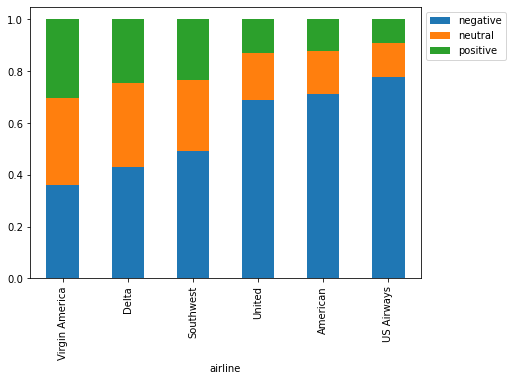

In [30]:
stacked_barplot(data, "airline", "airline_sentiment")

### - Virgin America has the highest ratio of positive feedback. This corresponds to my earlier idea that companies with higher positive would have fewer overall tweets and this proves my point. 
### - The opposite is not true as United the company with the most representations was third in negative to positive ratio.
### US Airways the second most tweeted about company had the worst negative to positive ratio.

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
All                              1960    955       1186        2263    2633   
Customer Service Issue            768    199        391         811     681   
Flight Booking Problems           130     44         61         122     144   
Can't Tell                        198    186        159         246     379   
Bad Flight                         87     64         90         104     216   
Cancelled Flight                  246     51        162         189     181   
Late Flight                       249    269        152         453     525   
Flight Attendant Complaints        87     60         38         123     168   
Lost Luggage                      149     57         90         154     269   
Damaged Luggage                    12     11         14          11      22   
longlines                          34     14        

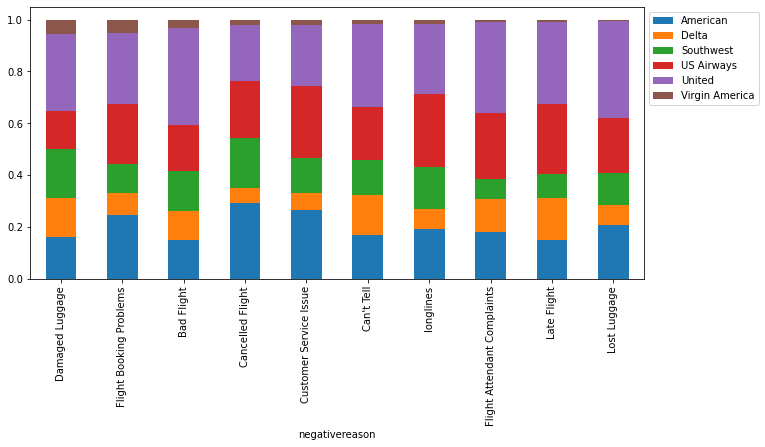

In [31]:
stacked_barplot(data,"negativereason","airline",)

### - Americans Airlines most common complaint is cancelled flights, followed by customer service issues and flight booking problems.
### - Deltas biggest most common complaint was late flights, followed by can't tell and damaged luggage.
### - Southwest airlines most common complaint was cancelled flights, followed by damaged luggage and long lines.
### - US Airways most common complaint was customer service issues, followed by long lines, flight attendant issues and late flights.
### - United Airlines most common complaint was bad flight, followed by flight attendant complaints, and lost or damaged luggage.
### - Virgin Americas most common complaint was flight booking problems, followed by damaged luggage and bad flights.


In [32]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())               
    stopwords = set(wordcloud.STOPWORDS)                                  
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',      
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

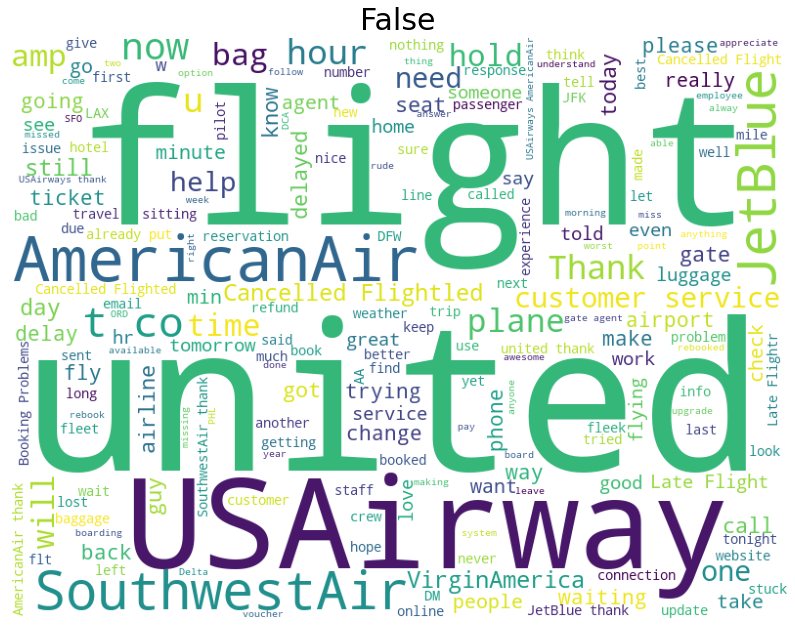

In [33]:
show_wordcloud(data,'airline_sentiment' == 'positive')

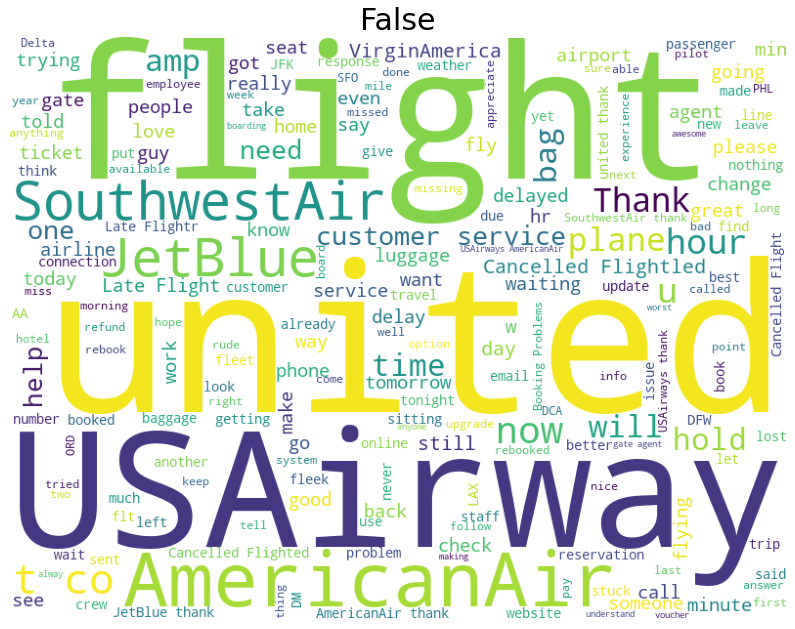

In [34]:
show_wordcloud(data,'airline_sentiment' == 'neutral')

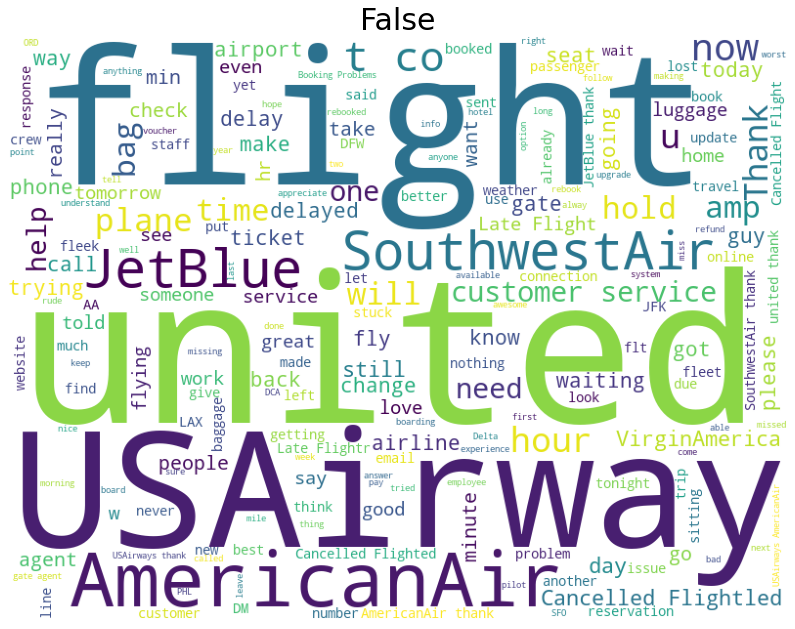

In [35]:
show_wordcloud(data,'airline_sentiment' == 'negative')

### - The word clouds of the positive, negative, and neutral sentiment all show common main words. Flight, and the airline names seem to be the most promenent words in all three.

# 4) Reducing the Data down to 'text' and 'airline_sentiment'

In [36]:
# taking a look at the remaining columns in data dataframe
data.columns

Index(['airline_sentiment', 'negativereason', 'airline', 'text'], dtype='object')

In [37]:
data.drop(columns=["airline", "negativereason"], axis=1, inplace=True)

In [38]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### - I now have only 2 columns, airline_sentiment and text (refering to the text of the tweet)

# 5) Reduced Data Pre-Processing

### HTML Tag Removal

In [39]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Removal of Contractions

In [40]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


### Removal of Numbers

In [41]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


### Tokenization

In [42]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


### Removal of Special Characters and Punctuation

In [43]:
# Removing non_ascii characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [44]:
data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))

data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


In [45]:
# Removing punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [46]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commer..."
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean..."
3,negative,"[VirginAmerica, it, is, really, aggressive, to..."
4,negative,"[VirginAmerica, and, it, is, a, really, big, b..."


### Conversion to Lowercase

In [47]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [48]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


### Lemmatization

In [49]:
#lemmatization of words to their root

lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

data['text'] = data['text'].apply(lambda x: lemmatize_list(x))

data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


### Joining words back into a text string

In [50]:
# normalizing back into a 
def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = to_lowercase(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercial t...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...


### Looking at the preprocessed data

In [51]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercial t...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...


In [52]:
data.tail()

,airline_sentiment,text
14635,positive,americanair thank you we got on a different fl...
14636,negative,americanair leaving over minute late flight no...
14637,neutral,americanair please bring american airline to b...
14638,negative,americanair you have my money you change my fl...
14639,neutral,americanair we have people so we need know how...


# 6) Text Vectorization

### CountVectorizer

In [54]:
%%time
# list of text documents
text = data['text']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'virginamerica': 12276, 'what': 12510, 'dhepburn': 2765, 'said': 8883, 'plus': 7812, 'you': 12838, 'have': 4603, 'added': 145, 'commercial': 2019, 'to': 11593, 'the': 11394, 'experience': 3538, 'tacky': 10047, 'did': 2779, 'not': 7055, 'today': 11596, 'must': 6731, 'mean': 6353, 'need': 6826, 'take': 10059, 'another': 492, 'trip': 11759, 'it': 5342, 'is': 5317, 'really': 8301, 'aggressive': 228, 'blast': 1131, 'obnoxious': 7157, 'entertainment': 3333, 'in': 5049, 'your': 12848, 'guest': 4491, 'face': 3594, 'they': 11441, 'little': 5965, 'recourse': 8358, 'and': 445, 'big': 1078, 'bad': 845, 'thing': 11450, 'about': 51, 'seriously': 9131, 'would': 12723, 'pay': 7566, 'flight': 3834, 'for': 3984, 'seat': 9043, 'that': 11390, 'this': 11462, 'playing': 7776, 'only': 7261, 'flying': 3924, 'va': 12173, 'yes': 12823, 'nearly': 6823, 'every': 3440, 'time': 11542, 'fly': 3911, 'vx': 12326, 'ear': 3130, 'worm': 12695, 'will': 12589, 'go': 4327, 'away': 800, 'missed': 6553, 'prime': 8014, 'oppor

(14640, 12907)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Wall time: 1.31 s


### TF-IDFVectorizer

In [89]:
text = data['text']
# create the transform
vectorizer2 = TfidfVectorizer()
# tokenize and build vocab
vectorizer2.fit(text)
# summarize
print(vectorizer2.vocabulary_)
print(vectorizer2.idf_)
# encode document
vector2 = vectorizer2.transform(text)
# summarize encoded vector
print(vector2.shape)
print(vector2.toarray())

{'virginamerica': 12276, 'what': 12510, 'dhepburn': 2765, 'said': 8883, 'plus': 7812, 'you': 12838, 'have': 4603, 'added': 145, 'commercial': 2019, 'to': 11593, 'the': 11394, 'experience': 3538, 'tacky': 10047, 'did': 2779, 'not': 7055, 'today': 11596, 'must': 6731, 'mean': 6353, 'need': 6826, 'take': 10059, 'another': 492, 'trip': 11759, 'it': 5342, 'is': 5317, 'really': 8301, 'aggressive': 228, 'blast': 1131, 'obnoxious': 7157, 'entertainment': 3333, 'in': 5049, 'your': 12848, 'guest': 4491, 'face': 3594, 'they': 11441, 'little': 5965, 'recourse': 8358, 'and': 445, 'big': 1078, 'bad': 845, 'thing': 11450, 'about': 51, 'seriously': 9131, 'would': 12723, 'pay': 7566, 'flight': 3834, 'for': 3984, 'seat': 9043, 'that': 11390, 'this': 11462, 'playing': 7776, 'only': 7261, 'flying': 3924, 'va': 12173, 'yes': 12823, 'nearly': 6823, 'every': 3440, 'time': 11542, 'fly': 3911, 'vx': 12326, 'ear': 3130, 'worm': 12695, 'will': 12589, 'go': 4327, 'away': 800, 'missed': 6553, 'prime': 8014, 'oppor

(14640, 12907)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 7) Modeling (based off the CountVectorizer and RandomForest)

In [63]:
vector.shape

(14640, 12907)

In [64]:
labels = data['airline_sentiment']


In [66]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.3, random_state=27)

In [67]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7187841530054644


In [68]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [69]:
%%time
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

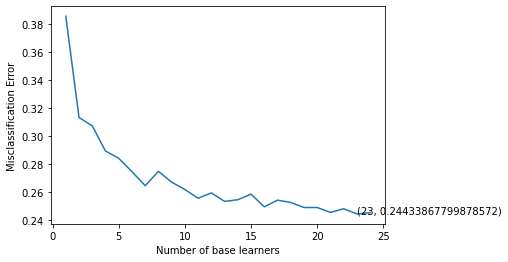

In [70]:
# plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores] 
#Selection of optimal nu of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]   
#Plot between each nu of estimator and misclassification error
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [71]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7431693989071039

In [72]:
result =  clf.predict(X_test)

[[2604   87   19]
 [ 528  357   49]
 [ 338  107  303]]
0.743169398907104


<AxesSubplot:>

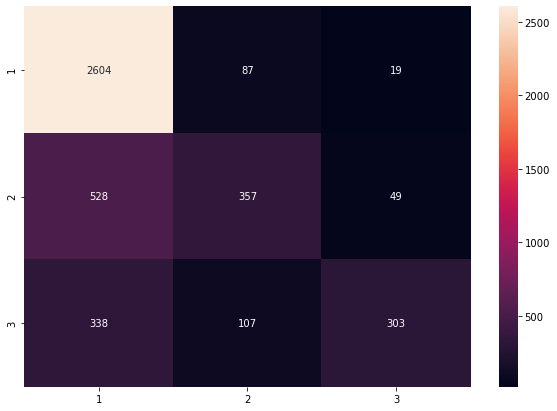

In [93]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

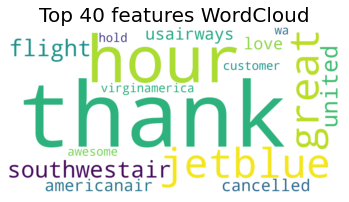

In [80]:
#Instantiate the feature from the vectorizer
all_features = vectorizer.get_feature_names()            
# Addition of top 40 feature into top_feature after training the model
top_features=''                                            
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 20), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# 8) Modeling (based off the TF-IDFVectorizer and RandomForest)

In [94]:
vector2.shape

(14640, 12907)

In [95]:
# Split data into training and testing set.
X_train2, X_test2, y_train2, y_test2 = train_test_split(vector2, labels, test_size=0.3, random_state=27)

In [96]:
forest2 = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest2 = forest2.fit(X_train2, y_train2)

print(forest2)

print(np.mean(cross_val_score(forest2, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7188524590163935


In [97]:
%%time
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train2, y_train2, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

Wall time: 5min 38s


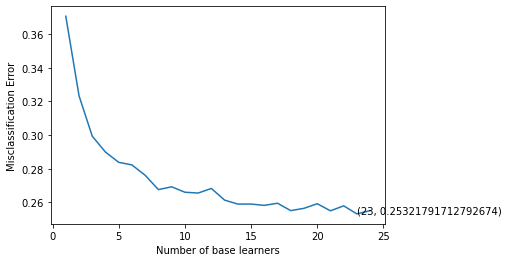

In [98]:
# plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores] 
#Selection of optimal nu of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]   
#Plot between each nu of estimator and misclassification error
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [99]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train2, y_train2)
clf.score(X_test2, y_test2)

0.7281420765027322

In [100]:
result2 =  clf.predict(X_test2)

[[2608   78   24]
 [ 570  315   49]
 [ 382   91  275]]
0.743169398907104


<AxesSubplot:>

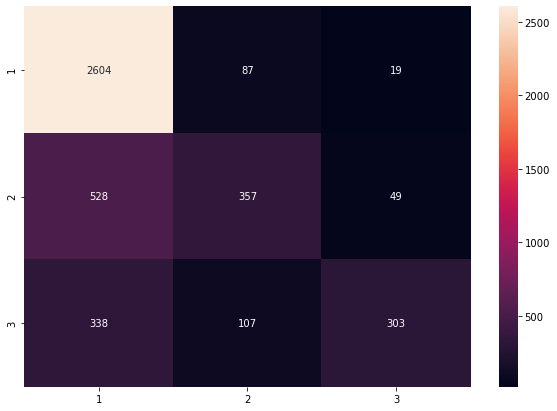

In [101]:
conf_mat2 = confusion_matrix(y_test2, result2)

print(conf_mat2)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

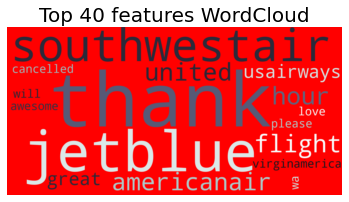

In [107]:
#Instantiate the feature from the vectorizer
all_features = vectorizer2.get_feature_names()            
# Addition of top 40 feature into top_feature after training the model
top_features=''                                            
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
wordcloud = WordCloud(background_color="red",colormap='bone',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 20), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# 9) Conclusion

### - I was able to work with the original (copy actually) to manipulate through preprocessing to get to the information required for the EDA requested in the outline.
### - The EDA was insightful as to how the data tracked between the airlines and thier most common complaints.
### - Reducing the data and reprocessing was able to get me hands on experience with the process and to a point where I was able to vectorize the words for model building.
### - The models built using random forest on both the countvectorizer and tf-idfvectorizer scored 74.3 and 72.8 respectively. 
### - The models could be better tuned by playing with the hyperparameters some more.